In [154]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
import pandas as pd

In [223]:
df = pd.read_csv('./Data/dengue_features_train.csv', encoding='utf-8',index_col='week_start_date')
df3 = pd.read_csv('./Data/dengue_features_train.csv', encoding='utf-8')

In [224]:
df3.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [226]:
df_tp = df3.drop(labels=['year','weekofyear','city','week_start_date'],axis=1).transpose()
df_tp.head()

,0,1,2,3,4,5,6,7,8,9,...,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455
ndvi_ne,0.122600,0.169900,0.032250,0.128633,0.19620,NaN,0.112900,0.072500,0.102450,NaN,...,0.231486,0.239743,0.260814,0.168686,0.263071,0.342750,0.160157,0.247057,0.333914,0.298186
ndvi_nw,0.103725,0.142175,0.172967,0.245067,0.26220,0.174850,0.092800,0.072500,0.146175,0.121550,...,0.294686,0.259271,0.255786,0.158500,0.272500,0.318900,0.160371,0.146057,0.245771,0.232971
ndvi_se,0.198483,0.162357,0.157200,0.227557,0.25120,0.254314,0.205071,0.151471,0.125571,0.160683,...,0.331657,0.307786,0.257771,0.133071,0.258271,0.256343,0.136043,0.250357,0.278886,0.274214
ndvi_sw,0.177617,0.155486,0.170843,0.235886,0.24734,0.181743,0.210271,0.133029,0.123600,0.202567,...,0.244400,0.307943,0.340286,0.145600,0.244500,0.292514,0.225657,0.233714,0.325486,0.315757
precipitation_amt_mm,12.420000,22.820000,34.540000,15.360000,7.52000,9.580000,3.480000,151.120000,19.320000,14.410000,...,86.700000,26.000000,73.970000,59.400000,1.150000,55.300000,86.470000,58.940000,59.670000,63.220000


In [178]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [179]:
#tipo de dato de las variables
df.dtypes

year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c  

In [160]:
#muestra si hay valores nulos
df.isnull().values.any()

True

In [161]:
df_sj = df.loc[df['city'] == 'sj']
df_iq = df.loc[df['city'] == 'iq']

In [162]:
dff_sj = df_sj.drop(labels=['city'],axis=1)
dff_iq = df_iq.drop(labels=['city'],axis=1)

In [163]:
dff_iq.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
2000-07-01,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
2000-07-08,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
2000-07-15,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
2000-07-22,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
2000-07-29,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


Text(0.5, 1, 'Iquitos Variable Correlations')

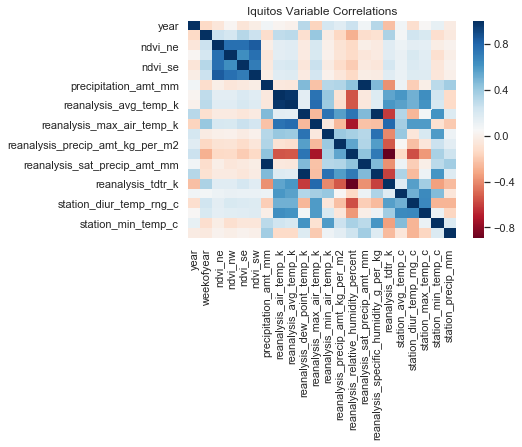

In [166]:

sns.heatmap(dff_iq.corr(), cmap='RdBu')
plt.title('Iquitos Variable Correlations')


Text(0.5, 1, 'San Juan Variable Correlations')

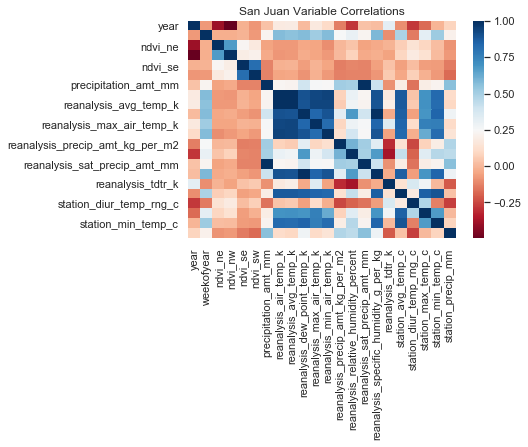

In [167]:
sns.heatmap(dff_sj.corr(), cmap='RdBu')
plt.title('San Juan Variable Correlations')


In [227]:
 names =  df_tp.index
print(names)

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')


In [228]:
df_tp.head()

,0,1,2,3,4,5,6,7,8,9,...,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455
ndvi_ne,0.122600,0.169900,0.032250,0.128633,0.19620,NaN,0.112900,0.072500,0.102450,NaN,...,0.231486,0.239743,0.260814,0.168686,0.263071,0.342750,0.160157,0.247057,0.333914,0.298186
ndvi_nw,0.103725,0.142175,0.172967,0.245067,0.26220,0.174850,0.092800,0.072500,0.146175,0.121550,...,0.294686,0.259271,0.255786,0.158500,0.272500,0.318900,0.160371,0.146057,0.245771,0.232971
ndvi_se,0.198483,0.162357,0.157200,0.227557,0.25120,0.254314,0.205071,0.151471,0.125571,0.160683,...,0.331657,0.307786,0.257771,0.133071,0.258271,0.256343,0.136043,0.250357,0.278886,0.274214
ndvi_sw,0.177617,0.155486,0.170843,0.235886,0.24734,0.181743,0.210271,0.133029,0.123600,0.202567,...,0.244400,0.307943,0.340286,0.145600,0.244500,0.292514,0.225657,0.233714,0.325486,0.315757
precipitation_amt_mm,12.420000,22.820000,34.540000,15.360000,7.52000,9.580000,3.480000,151.120000,19.320000,14.410000,...,86.700000,26.000000,73.970000,59.400000,1.150000,55.300000,86.470000,58.940000,59.670000,63.220000


In [230]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

TypeError: can only concatenate str (not "float") to str

In [205]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_tp)





In [206]:
features_norm

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.99357179e-03, 9.47697105e-03, 1.00342078e-02, ...,
        1.13709471e-02, 1.18194694e-02, 1.23233331e-02],
       [9.48541903e-06, 1.39331563e-05, 0.00000000e+00, ...,
        5.02524078e-05, 4.38575517e-05, 3.24486864e-05],
       ...,
       [1.47225136e-02, 1.58593366e-02, 1.61649605e-02, ...,
        1.59483942e-02, 1.54019970e-02, 1.66521931e-02],
       [9.99864930e-03, 1.10851261e-02, 1.14412658e-02, ...,
        9.48026247e-03, 1.03267496e-02, 1.09301368e-02],
       [7.98849427e-03, 4.25046699e-03, 2.07881510e-02, ...,
        3.60918908e-03, 7.83888317e-03, 1.00345106e-02]])

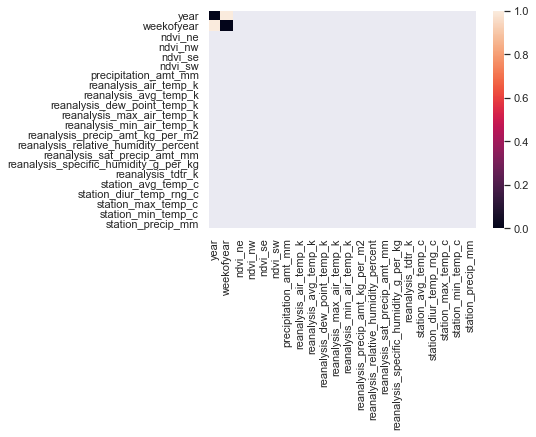

In [207]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)